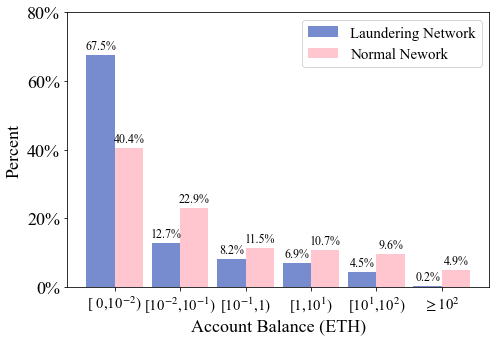

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
config = {
            "font.family": 'Times New Roman',
            "font.size": 15,
            "mathtext.fontset": 'stix',
            "font.serif": ['Times New Roman'],
         }
rcParams.update(config)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height*100,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=12)

labels =['[ 0,10$^{-2}$)', '[10$^{-2}$,10$^{-1}$)','[10$^{-1}$,1)','[1,10$^{1}$)','[10$^{1}$,10$^{2}$)','$\geq$10$^{2}$']
a = [0.6749, 0.1272, 0.082,  0.0691,  0.045, 0.0018]
b = [0.4037, 0.2294, 0.1149, 0.1066, 0.0965,0.0489]
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

#x = np.arange(len(labels))  # the label locations
x = np.array([0,3,6,9,12,15])
width = 1.3 # the width of the bars

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('../../Code_Results/Visual_Ac_Balance.pdf') as pdf:
    plt.rc('font',family='Times New Roman') #全局字体设置
    fig, ax = plt.subplots(figsize=(7,5))
    rects1 = ax.bar(x - width/2, a, width, label='Laundering Network',color='#768CCE')
    rects2 = ax.bar(x + width/2, b, width, label='Normal Nework',color='#FFC6D0')
    # aa = [67.49, 12.72, 8.2,  6.91,  4.5, 0.18]
    # bb = [40.37, 22.94, 11.49, 10.66, 9.65,4.89]
    # rects11 = ax.bar(x - width/2, aa, width)
    # rects22 = ax.bar(x + width/2, bb, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_xlabel('Account Balance (ETH)')
    # ax.set_title('Scores by group and gender')
    ax.set_xticks([0,3,6,9,12,15])
    ax.set_yticks(np.arange(0, 0.9, 0.20))
    ax.set_xticklabels(labels,fontproperties = 'Times New Roman')
    ax.legend()
    plt.legend(fontsize=15)

    plt.yticks(fontproperties = 'Times New Roman', size = 18)
    plt.xticks(fontproperties = 'Times New Roman', size =15)
    plt.xlabel("Account Balance (ETH)", fontproperties = 'Times New Roman', size = 18)
    plt.ylabel("Percent",fontproperties = 'Times New Roman', size = 18)
#     plt.legend(fontproperties = 'Times New Roman', size = 20)
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    # plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
    pdf.savefig(bbox_inches = 'tight')
    plt.show()


In [37]:
x

array([0, 1, 2, 3, 4, 5])

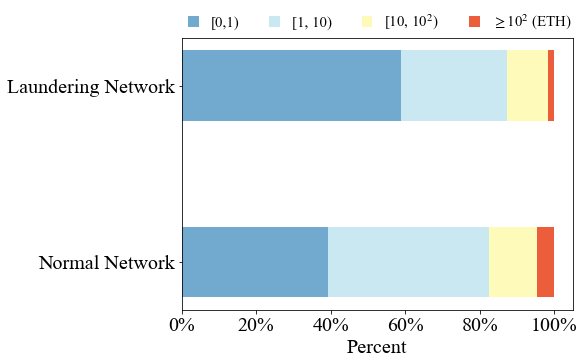

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('../../Code_Results/Visual_Ac_Tx_value.pdf') as pdf:
    config = {
                "font.family": 'Times New Roman',
                "font.size": 15,
                "mathtext.fontset": 'stix',
                "font.serif": ['Times New Roman'],
             }
    rcParams.update(config)

    fig=plt.figure(figsize=(7,5))#调整画布大小

    N = 7
    y1 = (0.3913,0.5883)
    y2 = (0.4336,0.2862)

    d = []
    for i in range(0, len(y2)):
        sum = y1[i] + y2[i]
        d.append(sum)
    y3 = (0.1299,0.1097)

    d2 = []
    for i in range(0, len(y2)):
        sum = y1[i] + y2[i] +y3[i]
        d2.append(sum)
    y4=(0.04525,0.01585)


    x = (1,2)  # the x locations for the groups
    width = 0.4  # the width of the bars: can also be len(x) sequence

    #3951A2 深蓝
    #72AACF 天蓝
    #CAE8F2 浅蓝
    #FEFBBA 浅黄
    #FDB96B 橘色
    #EC5D3B 深橘
    #A80326 深红
    #f9766e 桃红
    #00bfc4 蓝绿

    p1 = plt.barh(x, y1, width, color='#72AACF')  # , yerr=menStd)
    p2 = plt.barh(x, y2, width, left=y1, color='#CAE8F2')  # , yerr=womenStd)
    p3 = plt.barh(x, y3, width, left=d,color='#FEFBBA')
    p4=  plt.barh(x, y4, width, left=d2,color='#EC5D3B')
    # p5=  plt.barh(x, y5, width, left=d3,color='#7B7B7B')

    plt.xlabel('Percent',size=20)
    # plt.ylabel('定位方式')
    #plt.title('Scores by group and gender')
    plt.yticks(x, ('Normal Network','Laundering Network'),size=20)
    plt.xticks(np.arange(0, 1.1, 0.20),size=20)
    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
    # plt.grid(which='major',axis='x',linestyle='dotted')

    #plt.legend((p1[0], p2[0], p3[0],p4[0], p5[0]), ('[0,50 m]', '(50 m, 200 m]', '(200 m, 500 m]','(500 m, 1000 m]','(1000 m, ∞)'))
    #plt.legend((p1[0], p2[0], p3[0],p4[0], p5[0]), ('[0,50 m]', '(50 m, 200 m]', '(200 m, 500 m]','(500 m, 1000 m]','(1000 m, ∞)'),ncol=5,bbox_to_anchor=(0.5, -0.1), loc=8, borderaxespad=-3,frameon=False,handlelength=0.7)
    plt.legend((p1[0], p2[0], p3[0],p4[0]), ('[0,1)', '[1, 10)', '[10, 10$^2$)','$\geq$10$^2$ (ETH)'), ncol=4,bbox_to_anchor=(-0.00,1),loc="lower left", borderaxespad=0,frameon=False,handlelength=0.7)

    pdf.savefig(bbox_inches = 'tight')
    plt.show()
#     fig.savefig('jingdu81.jpg',bbox_inches='tight')